In [1]:
using Turing, Distributions, Plots

In [2]:
@model function nealsfunnel()
    y ~ Normal(0,3)
    x ~ Normal(0,exp(y/2))
end

@model function nealsfunnel_re()
    y_raw ~ Normal(0,1)
    x_raw ~ Normal(0,1)
end

nealsfunnel_re (generic function with 1 method)

In [3]:
model = nealsfunnel()
model_re = nealsfunnel_re();

In [4]:
# now sample from this models
iterations = 5000
chain = sample(model, NUTS(0.65), iterations)
chain_re = sample(model_re, NUTS(0.65), iterations);

┌ Info: Found initial step size
│   ϵ = 1.6
└ @ Turing.Inference /home/ritesh/.julia/packages/Turing/RzDvB/src/inference/hmc.jl:625
Sampling:   0%|                                         |  ETA: N/A┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, true, false)
└ @ AdvancedHMC /home/ritesh/.julia/packages/AdvancedHMC/P9wqk/src/hamiltonian.jl:47
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:01
┌ Info: Found initial step size
│   ϵ = 3.2
└ @ Turing.Inference /home/ritesh/.julia/packages/Turing/RzDvB/src/inference/hmc.jl:625
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


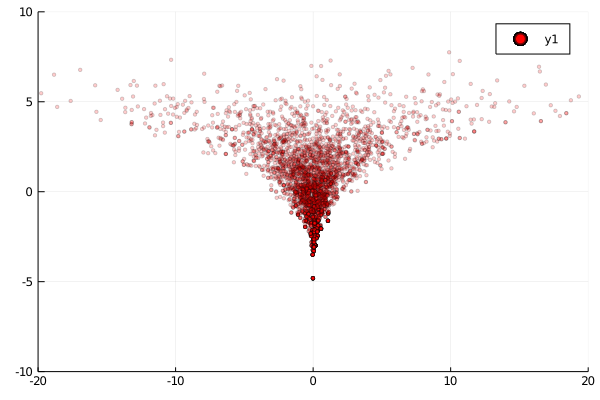

In [5]:
y,x = Array(chain[:y])[:,1], Array(chain[:x])[:,1];
plot(scatter(x, y, markersize=2.0, markeralpha=0.2, markercolor="red"), xlims = (-20,20),ylims=(-10,10))

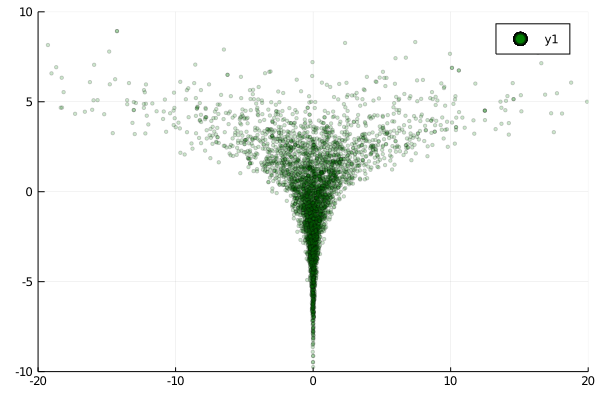

In [6]:
y_re = Array(chain_re[:y_raw])[:,1].*3.0
x_re = Array(chain_re[:x_raw]).*exp.(y_re./2.0)
plot(scatter(x_re, y_re, markersize=2.0, markeralpha=0.2, markercolor="green"), xlims = (-20,20),ylims=(-10,10))